In [1]:
# %load command1.py
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

%config InlineBackend.figure_format='svg'
plt.rcParams['figure.dpi']=120

pd.options.display.float_format='{:,.2f}'.format
pd.set_option('display.max_colwidth', None)


In [2]:
import pandas as pd

df=pd.read_csv('./data/NYPD_crime_1.csv')
df.head()

,incident_zip,created_date,latitude,longitude
0,10027,2015-07-03T00:36:07.000,NaN,NaN
1,10026,2015-07-02T22:06:35.000,NaN,NaN
2,11212,2015-07-06T00:27:34.000,NaN,NaN
3,10029,2015-07-17T01:50:10.000,NaN,NaN
4,10029,2015-10-22T19:49:45.000,NaN,NaN


<h2> Change the order of columns</h2>

In [3]:
df.columns

columns=['created_date', 'incident_zip','latitude', 'longitude']
df=df[columns]
df.head()

Index(['incident_zip', 'created_date', 'latitude', 'longitude'], dtype='object')

,created_date,incident_zip,latitude,longitude
0,2015-07-03T00:36:07.000,10027,NaN,NaN
1,2015-07-02T22:06:35.000,10026,NaN,NaN
2,2015-07-06T00:27:34.000,11212,NaN,NaN
3,2015-07-17T01:50:10.000,10029,NaN,NaN
4,2015-10-22T19:49:45.000,10029,NaN,NaN


<h2> Rename columns</h2>

In [4]:
df.rename(columns={'created_date':'date', 'incident_zip':'zip'}, inplace=True)
df.head()

,date,zip,latitude,longitude
0,2015-07-03T00:36:07.000,10027,NaN,NaN
1,2015-07-02T22:06:35.000,10026,NaN,NaN
2,2015-07-06T00:27:34.000,11212,NaN,NaN
3,2015-07-17T01:50:10.000,10029,NaN,NaN
4,2015-10-22T19:49:45.000,10029,NaN,NaN


<h2> Remove the miliseconds</h2>

In [5]:
df['date']=df['date'].str.slice(start=0, stop=19)
df.head()

,date,zip,latitude,longitude
0,2015-07-03T00:36:07,10027,NaN,NaN
1,2015-07-02T22:06:35,10026,NaN,NaN
2,2015-07-06T00:27:34,11212,NaN,NaN
3,2015-07-17T01:50:10,10029,NaN,NaN
4,2015-10-22T19:49:45,10029,NaN,NaN


In [6]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1000 non-null   datetime64[ns]
 1   zip        1000 non-null   int64         
 2   latitude   966 non-null    float64       
 3   longitude  966 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 31.4 KB


In [7]:
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day_of_num']=df['date'].dt.weekday
df

,date,zip,latitude,longitude,year,month,day_of_num
0,2015-07-03 00:36:07,10027,NaN,NaN,2015,7,4
1,2015-07-02 22:06:35,10026,NaN,NaN,2015,7,3
2,2015-07-06 00:27:34,11212,NaN,NaN,2015,7,0
3,2015-07-17 01:50:10,10029,NaN,NaN,2015,7,4
4,2015-10-22 19:49:45,10029,NaN,NaN,2015,10,3
...,...,...,...,...,...,...,...
995,2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0
996,2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6
997,2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6
998,2020-06-14 23:21:30,10472,40.83,-73.87,2020,6,6


In [8]:
mapping={0:'Mon',
        1:'Tue',
        2:'Wed',
        3:'Thu',
        4:'Fri',
        5:'Sat',
        6:'Sun'}

df['day']=df['day_of_num'].map(mapping)
df

,date,zip,latitude,longitude,year,month,day_of_num,day
0,2015-07-03 00:36:07,10027,NaN,NaN,2015,7,4,Fri
1,2015-07-02 22:06:35,10026,NaN,NaN,2015,7,3,Thu
2,2015-07-06 00:27:34,11212,NaN,NaN,2015,7,0,Mon
3,2015-07-17 01:50:10,10029,NaN,NaN,2015,7,4,Fri
4,2015-10-22 19:49:45,10029,NaN,NaN,2015,10,3,Thu
...,...,...,...,...,...,...,...,...
995,2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0,Mon
996,2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun
997,2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun
998,2020-06-14 23:21:30,10472,40.83,-73.87,2020,6,6,Sun


In [9]:
# df=df.assign(datetime=lambda x:x.created_date.str.slice(start=0, stop=19)) 
# df

In [10]:
# df=df.assign(date=lambda x:x['datetime'].dt.date)
# df.info()

In [11]:
df['time']=df['date'].dt.time
df
df.info()

,date,zip,latitude,longitude,year,month,day_of_num,day,time
0,2015-07-03 00:36:07,10027,NaN,NaN,2015,7,4,Fri,00:36:07
1,2015-07-02 22:06:35,10026,NaN,NaN,2015,7,3,Thu,22:06:35
2,2015-07-06 00:27:34,11212,NaN,NaN,2015,7,0,Mon,00:27:34
3,2015-07-17 01:50:10,10029,NaN,NaN,2015,7,4,Fri,01:50:10
4,2015-10-22 19:49:45,10029,NaN,NaN,2015,10,3,Thu,19:49:45
...,...,...,...,...,...,...,...,...,...
995,2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0,Mon,01:22:09
996,2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,22:13:07
997,2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,21:35:08
998,2020-06-14 23:21:30,10472,40.83,-73.87,2020,6,6,Sun,23:21:30


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   zip         1000 non-null   int64         
 2   latitude    966 non-null    float64       
 3   longitude   966 non-null    float64       
 4   year        1000 non-null   int64         
 5   month       1000 non-null   int64         
 6   day_of_num  1000 non-null   int64         
 7   day         1000 non-null   object        
 8   time        1000 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(4), object(2)
memory usage: 70.4+ KB


In [12]:
df['time']=pd.to_datetime(df['time'], format='%H:%M:%S')
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   zip         1000 non-null   int64         
 2   latitude    966 non-null    float64       
 3   longitude   966 non-null    float64       
 4   year        1000 non-null   int64         
 5   month       1000 non-null   int64         
 6   day_of_num  1000 non-null   int64         
 7   day         1000 non-null   object        
 8   time        1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(4), object(1)
memory usage: 70.4+ KB


,date,zip,latitude,longitude,year,month,day_of_num,day,time
0,2015-07-03 00:36:07,10027,NaN,NaN,2015,7,4,Fri,1900-01-01 00:36:07
1,2015-07-02 22:06:35,10026,NaN,NaN,2015,7,3,Thu,1900-01-01 22:06:35
2,2015-07-06 00:27:34,11212,NaN,NaN,2015,7,0,Mon,1900-01-01 00:27:34
3,2015-07-17 01:50:10,10029,NaN,NaN,2015,7,4,Fri,1900-01-01 01:50:10
4,2015-10-22 19:49:45,10029,NaN,NaN,2015,10,3,Thu,1900-01-01 19:49:45
...,...,...,...,...,...,...,...,...,...
995,2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0,Mon,1900-01-01 01:22:09
996,2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,1900-01-01 22:13:07
997,2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,1900-01-01 21:35:08
998,2020-06-14 23:21:30,10472,40.83,-73.87,2020,6,6,Sun,1900-01-01 23:21:30


In [13]:
df.isnull().sum()

date           0
zip            0
latitude      34
longitude     34
year           0
month          0
day_of_num     0
day            0
time           0
dtype: int64

In [14]:
df1=df[['date', 'zip', 'latitude', 'longitude']]
df1.head()

,date,zip,latitude,longitude
0,2015-07-03 00:36:07,10027,NaN,NaN
1,2015-07-02 22:06:35,10026,NaN,NaN
2,2015-07-06 00:27:34,11212,NaN,NaN
3,2015-07-17 01:50:10,10029,NaN,NaN
4,2015-10-22 19:49:45,10029,NaN,NaN


In [15]:
df1=df1.set_index('date')
df1.head()

,zip,latitude,longitude
date,,,
2015-07-03 00:36:07,10027,NaN,NaN
2015-07-02 22:06:35,10026,NaN,NaN
2015-07-06 00:27:34,11212,NaN,NaN
2015-07-17 01:50:10,10029,NaN,NaN
2015-10-22 19:49:45,10029,NaN,NaN


<h2> Calculate the crime numbers by year</h2>

In [16]:
year_2015=df1.loc['2015'].count()
year_2015

zip          5
latitude     0
longitude    0
dtype: int64

In [17]:
Num_2015=year_2015['zip']
print(Num_2015)

5


In [18]:
print(df1.index.year.unique())
years=df1.index.year.unique()
print(years)

Int64Index([2015, 2016, 2021, 2014, 2017, 2019, 2020], dtype='int64', name='date')
Int64Index([2015, 2016, 2021, 2014, 2017, 2019, 2020], dtype='int64', name='date')


In [19]:
# calculating the number of crimes by year

def numberOfCrimeByYear(df):
    years=df1.index.year.unique()
    numOfCrimeByYear={}
    for year in years:
        year=str(year)
        value=df.loc[year].count()
        value=value['zip']
        numOfCrimeByYear[year]=value
    return numOfCrimeByYear

res=numberOfCrimeByYear(df1)
print(res)

res={key:res[key]  for key in sorted(res)}
print(res)

{'2015': 5, '2016': 2, '2021': 6, '2014': 1, '2017': 5, '2019': 134, '2020': 847}
{'2014': 1, '2015': 5, '2016': 2, '2017': 5, '2019': 134, '2020': 847, '2021': 6}


,2014,2015,2016,2017,2019,2020,2021
0,1,5,2,5,134,847,6


,Year,Num of Crimes
0,2014,1
1,2015,5
2,2016,2
3,2017,5
4,2019,134
5,2020,847
6,2021,6


<AxesSubplot:>

[Text(0, 0, '2014'),
 Text(1, 0, '2015'),
 Text(2, 0, '2016'),
 Text(3, 0, '2017'),
 Text(4, 0, '2019'),
 Text(5, 0, '2020'),
 Text(6, 0, '2021')]

(0.0, 1000.0)

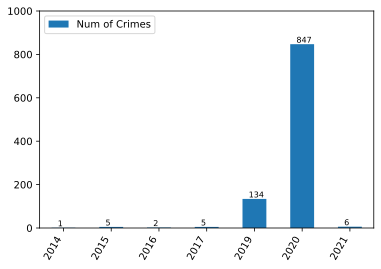

In [20]:
numYear=pd.DataFrame.from_dict([res])
numYear

df_crime_num=pd.melt(numYear, var_name='Year', value_name='Num of Crimes')
df_crime_num
ax=plt.subplot()
df_crime_num.plot(kind='bar', ax=ax)


x_indexes=ax.get_xticks()
ax.set_xticklabels(labels=df_crime_num['Year'].to_list(), rotation=-300, ha='right')
ax.set_ylim(0, 1000)
ax.legend(loc='upper left')

def addNumbertoBar(x_list, y_list):
    for i in range(1, len(x_list)+1):
        ax.annotate(f'{y_list[i-1]:,}', (x_list[i-1]-0.12, y_list[i-1]+7), ha='left', fontsize=8)
        
addNumbertoBar(x_indexes, df_crime_num['Num of Crimes'])

In [21]:
df_crime_num['shift_one_year']=df_crime_num['Num of Crimes'].shift(1, axis=0) # df_crime_num.shift(1)['Num of Crimes']
df_crime_num

,Year,Num of Crimes,shift_one_year
0,2014,1,NaN
1,2015,5,1.00
2,2016,2,5.00
3,2017,5,2.00
4,2019,134,5.00
5,2020,847,134.00
6,2021,6,847.00


In [22]:
df_crime_num=df_crime_num.assign(pct = lambda x:(x['Num of Crimes']/x['shift_one_year'])*100)
df_crime_num
df_crime_num['pct']=df_crime_num['pct'].apply(lambda x:f'{x:,.0f}%')
df_crime_num

,Year,Num of Crimes,shift_one_year,pct
0,2014,1,NaN,NaN
1,2015,5,1.00,500.00
2,2016,2,5.00,40.00
3,2017,5,2.00,250.00
4,2019,134,5.00,"2,680.00"
5,2020,847,134.00,632.09
6,2021,6,847.00,0.71


,Year,Num of Crimes,shift_one_year,pct
0,2014,1,NaN,nan%
1,2015,5,1.00,500%
2,2016,2,5.00,40%
3,2017,5,2.00,250%
4,2019,134,5.00,"2,680%"
5,2020,847,134.00,632%
6,2021,6,847.00,1%


In [23]:
# unstacked_numYear=numYear.unstack()
# unstacked_numYear
# df_numYear=pd.DataFrame(unstacked_numYear)
# df_numYear
# df_numYear.index
# df_numYear.set_index(df_numYear.index.get_level_values(0), inplace=True)
# print()
# df_numYear.rename(columns={0:'Number of crimes'})

<h2 style='color:red'>The number of crimes were peaked at 2020. The total number of crimes in 2020 was 847 cases. However, the percenatge of crime increase was peaked at 2019 over the previous year, marked 2,680%</h2>

## Create a sub-dataframe with only years 2019 and 2020
**Analyze the number of crimes by day**

In [24]:
df.head()
df.set_index('date', inplace=True)
df.head()

,date,zip,latitude,longitude,year,month,day_of_num,day,time
0,2015-07-03 00:36:07,10027,NaN,NaN,2015,7,4,Fri,1900-01-01 00:36:07
1,2015-07-02 22:06:35,10026,NaN,NaN,2015,7,3,Thu,1900-01-01 22:06:35
2,2015-07-06 00:27:34,11212,NaN,NaN,2015,7,0,Mon,1900-01-01 00:27:34
3,2015-07-17 01:50:10,10029,NaN,NaN,2015,7,4,Fri,1900-01-01 01:50:10
4,2015-10-22 19:49:45,10029,NaN,NaN,2015,10,3,Thu,1900-01-01 19:49:45


,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2015-07-03 00:36:07,10027,NaN,NaN,2015,7,4,Fri,1900-01-01 00:36:07
2015-07-02 22:06:35,10026,NaN,NaN,2015,7,3,Thu,1900-01-01 22:06:35
2015-07-06 00:27:34,11212,NaN,NaN,2015,7,0,Mon,1900-01-01 00:27:34
2015-07-17 01:50:10,10029,NaN,NaN,2015,7,4,Fri,1900-01-01 01:50:10
2015-10-22 19:49:45,10029,NaN,NaN,2015,10,3,Thu,1900-01-01 19:49:45


In [25]:
df_ty=df.loc['2019':'2020']
df_ty

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_6756\3526648308.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  df_ty=df.loc['2019':'2020']


,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2019-06-30 22:14:57,11103,40.76,-73.91,2019,6,6,Sun,1900-01-01 22:14:57
2019-07-14 22:44:43,11233,40.68,-73.92,2019,7,6,Sun,1900-01-01 22:44:43
2019-07-04 21:03:05,11223,40.60,-73.98,2019,7,3,Thu,1900-01-01 21:03:05
2020-02-01 18:29:47,11378,40.71,-73.90,2020,2,5,Sat,1900-01-01 18:29:47
2020-02-02 00:29:28,10308,40.56,-74.16,2020,2,6,Sun,1900-01-01 00:29:28
...,...,...,...,...,...,...,...,...
2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0,Mon,1900-01-01 01:22:09
2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,1900-01-01 22:13:07
2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,1900-01-01 21:35:08


In [26]:
groupedByDay=df_ty.groupby('day')
numByDay=groupedByDay['zip'].count()
numByDay=pd.DataFrame(numByDay)
numByDay

,zip
day,
Fri,123
Mon,93
Sat,317
Sun,171
Thu,96
Tue,102
Wed,79


In [27]:
numByDay.rename(columns={'zip':'Number of Crimes'}, inplace=True)
numByDay.reset_index(inplace=True)
numByDay

,day,Number of Crimes
0,Fri,123
1,Mon,93
2,Sat,317
3,Sun,171
4,Thu,96
5,Tue,102
6,Wed,79


In [28]:
numByDay=numByDay[['Number of Crimes', 'day']]
numByDay

,Number of Crimes,day
0,123,Fri
1,93,Mon
2,317,Sat
3,171,Sun
4,96,Thu
5,102,Tue
6,79,Wed


In [29]:
orderOfDay=pd.DataFrame({'day':['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']})
orderOfDay

orderOfDay=orderOfDay.reset_index()
orderOfDay

orderOfDay.set_index('day', inplace=True)
orderOfDay

,day
0,Mon
1,Tue
2,Wed
3,Thu
4,Fri
5,Sat
6,Sun


,index,day
0,0,Mon
1,1,Tue
2,2,Wed
3,3,Thu
4,4,Fri
5,5,Sat
6,6,Sun


,index
day,
Mon,0
Tue,1
Wed,2
Thu,3
Fri,4
Sat,5
Sun,6


In [30]:
numByDay['DayInOrder']=numByDay['day'].map(orderOfDay['index'])
numByDay

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_6756\2262500283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numByDay['DayInOrder']=numByDay['day'].map(orderOfDay['index'])


,Number of Crimes,day,DayInOrder
0,123,Fri,4
1,93,Mon,0
2,317,Sat,5
3,171,Sun,6
4,96,Thu,3
5,102,Tue,1
6,79,Wed,2


In [31]:
numByDay.sort_values(by=['DayInOrder'], inplace=True)
numByDay

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_6756\1967503844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numByDay.sort_values(by=['DayInOrder'], inplace=True)


,Number of Crimes,day,DayInOrder
1,93,Mon,0
5,102,Tue,1
6,79,Wed,2
4,96,Thu,3
0,123,Fri,4
2,317,Sat,5
3,171,Sun,6


1    0
5    1
6    2
4    3
0    4
2    5
3    6
Name: DayInOrder, dtype: int64


<BarContainer object of 7 artists>

[Text(0, 0, 'Mon'),
 Text(1, 0, 'Tue'),
 Text(2, 0, 'Wed'),
 Text(3, 0, 'Thu'),
 Text(4, 0, 'Fri'),
 Text(5, 0, 'Sat'),
 Text(6, 0, 'Sun')]

Text(0.5, 0, 'Day')

Text(0, 0.5, 'Number of Crimes')

Text(0.5, 1.02, 'Number of Crimes in New York\n(2019 and 2020)')

(0.0, 400.0)

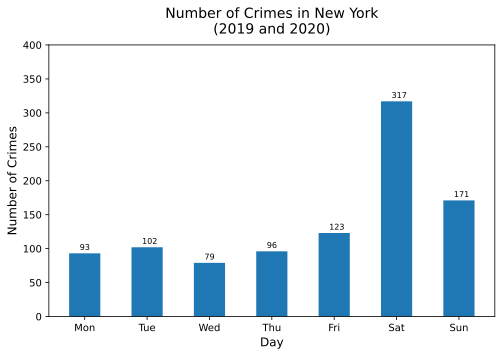

In [32]:
# numByDay.plot(kind='bar', x='day', y='Number of Crimes')

fig, ax=plt.subplots(figsize=(8, 5))

# Create x values
# x_indexes=np.arange(len(numByDay['day'])) 
x_indexes=numByDay['DayInOrder']
print(x_indexes)

ax.bar(x_indexes, numByDay['Number of Crimes'], width=0.5)

ax.set_xticks(x_indexes)
ax.set_xticklabels(numByDay['day'])
ax.set_xlabel('Day', fontsize=12)
ax.set_ylabel('Number of Crimes', fontsize=12)
ax.set_title('\n'.join(['Number of Crimes in New York', '(2019 and 2020)']), fontsize=14, y=1.02)
ax.set_ylim((0, 400))

def addNumbertoBar(x_list, y_list):
    for i in range(1, len(x_list)+1):
        ax.annotate(f'{y_list[i-1]:,}', (x_list[i-1]-0.08, y_list[i-1]+5), ha='left', fontsize=8)
        
addNumbertoBar(x_indexes, numByDay['Number of Crimes'])

<h2 style='color:red'>The highest number of crimes was marked on Satuday. The total number of crimes was 317 cases and followed by Sunday, 171 cases, Friday, 123 cases. </h2>

## Analyze the number of crimes on Saturday by hour 

In [33]:
df_ty
print()
cond=df_ty['day']=='Sat'
df_ty_sat=df_ty[cond]
df_ty_sat

,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2019-06-30 22:14:57,11103,40.76,-73.91,2019,6,6,Sun,1900-01-01 22:14:57
2019-07-14 22:44:43,11233,40.68,-73.92,2019,7,6,Sun,1900-01-01 22:44:43
2019-07-04 21:03:05,11223,40.60,-73.98,2019,7,3,Thu,1900-01-01 21:03:05
2020-02-01 18:29:47,11378,40.71,-73.90,2020,2,5,Sat,1900-01-01 18:29:47
2020-02-02 00:29:28,10308,40.56,-74.16,2020,2,6,Sun,1900-01-01 00:29:28
...,...,...,...,...,...,...,...,...
2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0,Mon,1900-01-01 01:22:09
2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,1900-01-01 22:13:07
2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,1900-01-01 21:35:08


,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2020-02-01 18:29:47,11378,40.71,-73.90,2020,2,5,Sat,1900-01-01 18:29:47
2020-01-25 20:43:23,11378,40.71,-73.90,2020,1,5,Sat,1900-01-01 20:43:23
2019-07-13 23:43:40,11226,40.65,-73.96,2019,7,5,Sat,1900-01-01 23:43:40
2019-06-08 23:24:27,11416,40.68,-73.86,2019,6,5,Sat,1900-01-01 23:24:27
2020-04-25 23:12:52,10040,40.86,-73.93,2020,4,5,Sat,1900-01-01 23:12:52
...,...,...,...,...,...,...,...,...
2020-06-13 21:50:08,10459,40.82,-73.89,2020,6,5,Sat,1900-01-01 21:50:08
2020-06-13 23:33:22,11233,40.68,-73.91,2020,6,5,Sat,1900-01-01 23:33:22
2020-06-13 21:36:44,10034,40.87,-73.93,2020,6,5,Sat,1900-01-01 21:36:44


In [34]:
df_ty_sat.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2020-02-01 18:29:47 to 2020-06-13 20:43:49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   zip         317 non-null    int64         
 1   latitude    313 non-null    float64       
 2   longitude   313 non-null    float64       
 3   year        317 non-null    int64         
 4   month       317 non-null    int64         
 5   day_of_num  317 non-null    int64         
 6   day         317 non-null    object        
 7   time        317 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 22.3+ KB


In [37]:
df_ty_sat['time']=pd.to_datetime(df_ty_sat['time'], format='%H:%M:%S')
df_ty_sat.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 317 entries, 2020-02-01 18:29:47 to 2020-06-13 20:43:49
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   zip         317 non-null    int64         
 1   latitude    313 non-null    float64       
 2   longitude   313 non-null    float64       
 3   year        317 non-null    int64         
 4   month       317 non-null    int64         
 5   day_of_num  317 non-null    int64         
 6   day         317 non-null    object        
 7   time        317 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 22.3+ KB


C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_6756\2609839853.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ty_sat['time']=pd.to_datetime(df_ty_sat['time'], format='%H:%M:%S')


In [39]:
df_ty_sat['hour']=df_ty_sat['time'].dt.hour
df_ty_sat

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_6756\3755609010.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ty_sat['hour']=df_ty_sat['time'].dt.hour


,zip,latitude,longitude,year,month,day_of_num,day,time,hour
date,,,,,,,,,
2020-02-01 18:29:47,11378,40.71,-73.90,2020,2,5,Sat,1900-01-01 18:29:47,18
2020-01-25 20:43:23,11378,40.71,-73.90,2020,1,5,Sat,1900-01-01 20:43:23,20
2019-07-13 23:43:40,11226,40.65,-73.96,2019,7,5,Sat,1900-01-01 23:43:40,23
2019-06-08 23:24:27,11416,40.68,-73.86,2019,6,5,Sat,1900-01-01 23:24:27,23
2020-04-25 23:12:52,10040,40.86,-73.93,2020,4,5,Sat,1900-01-01 23:12:52,23
...,...,...,...,...,...,...,...,...,...
2020-06-13 21:50:08,10459,40.82,-73.89,2020,6,5,Sat,1900-01-01 21:50:08,21
2020-06-13 23:33:22,11233,40.68,-73.91,2020,6,5,Sat,1900-01-01 23:33:22,23
2020-06-13 21:36:44,10034,40.87,-73.93,2020,6,5,Sat,1900-01-01 21:36:44,21


In [40]:
groupedByHour=df_ty_sat.groupby('hour')
groupedByHour=groupedByHour['zip'].count()
groupedByHour

hour
0     19
1     20
2     11
3      4
7      2
8      3
9      3
10     1
11     7
12     1
13     2
14     4
15     3
16     4
17     1
18     7
19     5
20    15
21    77
22    69
23    59
Name: zip, dtype: int64

In [41]:
df_hour=pd.DataFrame(groupedByHour)
df_hour=df_hour.rename(columns={'zip':'Num of Crimes'})
df_hour
df_hour['Num of Crimes'].sum()

,Num of Crimes
hour,
0,19
1,20
2,11
3,4
7,2
8,3
9,3
10,1
11,7


317

In [42]:
df_hour.loc[4]=[0]
df_hour.loc[5]=[0]
df_hour.loc[6]=[0]
df_hour.sort_index(inplace=True)
df_hour

,Num of Crimes
hour,
0,19
1,20
2,11
3,4
4,0
5,0
6,0
7,2
8,3


<BarContainer object of 24 artists>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


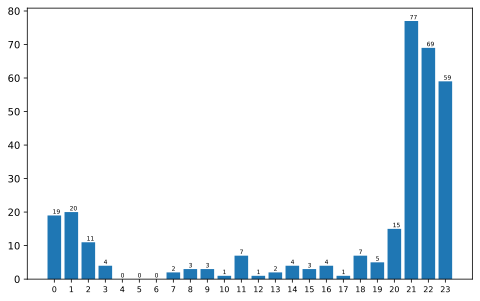

In [43]:
fig, ax=plt.subplots(figsize=(8,5))
x_ticks=np.arange(len(df_hour.index))

ax.set_xticks(x_ticks)
ax.bar(x_ticks, df_hour['Num of Crimes'])

ax.set_xticklabels(df_hour.index, fontsize=8)
print(x_ticks)

def addNumbertoBar(x_list, y_list):
    for i in range(1, len(x_list)+1):
        ax.annotate(f'{y_list[i-1]:,}', (x_list[i-1]-0.1, y_list[i-1]+0.5), ha='left', fontsize=6)
        
addNumbertoBar(x_ticks, df_hour['Num of Crimes'])

In [ ]:
df_hour['% of Crimes']=((df_hour['Num of Crimes']/df_hour['Num of Crimes'].sum())*100)
df_hour

<h2 style='color:red'>The highest number of crimes was marked between 9 pm and 10pm. The total number of crimes was 77 cases and followed 69 cases during the following hour, and 123 cases during 11 pm to midnight. </h2>

## Analyze the number of crimes on Sunday by hour

In [44]:
df_ty
print()
cond=df_ty['day']=='Sun'
df_ty_sun=df_ty[cond]
df_ty_sun

,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2019-06-30 22:14:57,11103,40.76,-73.91,2019,6,6,Sun,1900-01-01 22:14:57
2019-07-14 22:44:43,11233,40.68,-73.92,2019,7,6,Sun,1900-01-01 22:44:43
2019-07-04 21:03:05,11223,40.60,-73.98,2019,7,3,Thu,1900-01-01 21:03:05
2020-02-01 18:29:47,11378,40.71,-73.90,2020,2,5,Sat,1900-01-01 18:29:47
2020-02-02 00:29:28,10308,40.56,-74.16,2020,2,6,Sun,1900-01-01 00:29:28
...,...,...,...,...,...,...,...,...
2020-06-15 01:22:09,10455,40.81,-73.91,2020,6,0,Mon,1900-01-01 01:22:09
2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,1900-01-01 22:13:07
2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,1900-01-01 21:35:08


,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2019-06-30 22:14:57,11103,40.76,-73.91,2019,6,6,Sun,1900-01-01 22:14:57
2019-07-14 22:44:43,11233,40.68,-73.92,2019,7,6,Sun,1900-01-01 22:44:43
2020-02-02 00:29:28,10308,40.56,-74.16,2020,2,6,Sun,1900-01-01 00:29:28
2019-06-09 02:09:45,10027,40.81,-73.95,2019,6,6,Sun,1900-01-01 02:09:45
2019-06-09 21:03:04,11216,40.69,-73.95,2019,6,6,Sun,1900-01-01 21:03:04
...,...,...,...,...,...,...,...,...
2020-06-14 09:29:12,11208,NaN,NaN,2020,6,6,Sun,1900-01-01 09:29:12
2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,1900-01-01 22:13:07
2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,1900-01-01 21:35:08


In [45]:
df_ty_sun['hour']=df_ty_sun['time'].dt.hour
df_ty_sun
print()
groupedByHour=df_ty_sun.groupby('hour')
groupedByHour=groupedByHour['zip'].count()
groupedByHour
print()
df_hour=pd.DataFrame(groupedByHour)
df_hour=df_hour.rename(columns={'zip':'Num of Crimes'})
df_hour
df_hour['Num of Crimes'].sum()

C:\Users\Kwang-Chul Kwon\AppData\Local\Temp\ipykernel_6756\3038732775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ty_sun['hour']=df_ty_sun['time'].dt.hour


,zip,latitude,longitude,year,month,day_of_num,day,time,hour
date,,,,,,,,,
2019-06-30 22:14:57,11103,40.76,-73.91,2019,6,6,Sun,1900-01-01 22:14:57,22
2019-07-14 22:44:43,11233,40.68,-73.92,2019,7,6,Sun,1900-01-01 22:44:43,22
2020-02-02 00:29:28,10308,40.56,-74.16,2020,2,6,Sun,1900-01-01 00:29:28,0
2019-06-09 02:09:45,10027,40.81,-73.95,2019,6,6,Sun,1900-01-01 02:09:45,2
2019-06-09 21:03:04,11216,40.69,-73.95,2019,6,6,Sun,1900-01-01 21:03:04,21
...,...,...,...,...,...,...,...,...,...
2020-06-14 09:29:12,11208,NaN,NaN,2020,6,6,Sun,1900-01-01 09:29:12,9
2020-06-14 22:13:07,10457,40.84,-73.90,2020,6,6,Sun,1900-01-01 22:13:07,22
2020-06-14 21:35:08,10030,40.82,-73.94,2020,6,6,Sun,1900-01-01 21:35:08,21


hour
0     37
1     16
2      3
4      1
5      1
9      1
11     3
12     1
15     2
16     2
19     2
20    12
21    45
22    32
23    13
Name: zip, dtype: int64

,Num of Crimes
hour,
0,37
1,16
2,3
4,1
5,1
9,1
11,3
12,1
15,2


171

,Num of Crimes
hour,
0,37
1,16
2,3
3,0
4,1
5,1
6,0
7,0
8,0


<BarContainer object of 24 artists>

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21'),
 Text(22, 0, '22'),
 Text(23, 0, '23')]

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


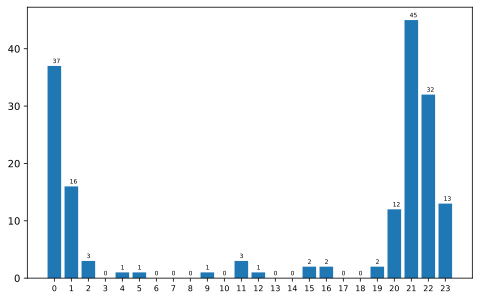

In [46]:
df_hour.loc[3]=[0]
df_hour.loc[6]=[0]
df_hour.loc[7]=[0]
df_hour.loc[8]=[0]
df_hour.loc[10]=[0]
df_hour.loc[13]=[0]
df_hour.loc[14]=[0]
df_hour.loc[17]=[0]
df_hour.loc[18]=[0]
df_hour.sort_index(inplace=True)
df_hour

fig, ax=plt.subplots(figsize=(8,5))
x_ticks=np.arange(len(df_hour.index))

ax.set_xticks(x_ticks)
ax.bar(x_ticks, df_hour['Num of Crimes'])

ax.set_xticklabels(df_hour.index, fontsize=8)
print(x_ticks)

def addNumbertoBar(x_list, y_list):
    for i in range(1, len(x_list)+1):
        ax.annotate(f'{y_list[i-1]:,}', (x_list[i-1]-0.1, y_list[i-1]+0.5), ha='left', fontsize=6)
        
addNumbertoBar(x_ticks, df_hour['Num of Crimes'])

In [47]:
df_hour['% of Crimes']=((df_hour['Num of Crimes']/df_hour['Num of Crimes'].sum())*100)
df_hour

,Num of Crimes,% of Crimes
hour,,
0,37,21.64
1,16,9.36
2,3,1.75
3,0,0.00
4,1,0.58
5,1,0.58
6,0,0.00
7,0,0.00
8,0,0.00


<h2 style='color:blue' align='center'> Analysis will continue with geopnadas using latitude and longitude information</h2>

In [48]:
df_ty.shape
df_ty.head()

(981, 8)

,zip,latitude,longitude,year,month,day_of_num,day,time
date,,,,,,,,
2019-06-30 22:14:57,11103,40.76,-73.91,2019,6,6,Sun,1900-01-01 22:14:57
2019-07-14 22:44:43,11233,40.68,-73.92,2019,7,6,Sun,1900-01-01 22:44:43
2019-07-04 21:03:05,11223,40.60,-73.98,2019,7,3,Thu,1900-01-01 21:03:05
2020-02-01 18:29:47,11378,40.71,-73.90,2020,2,5,Sat,1900-01-01 18:29:47
2020-02-02 00:29:28,10308,40.56,-74.16,2020,2,6,Sun,1900-01-01 00:29:28


In [49]:
from collections import Counter
zipCounter=Counter(df_ty['zip'])
zipCounter

sorted_zipCounter={key:zipCounter[key] for key in sorted(zipCounter)}
sorted_zipCounter

Counter({11103: 5,
         11233: 12,
         11223: 3,
         11378: 8,
         10308: 12,
         11226: 157,
         11385: 7,
         11220: 7,
         10027: 7,
         11416: 3,
         11216: 1,
         10461: 10,
         11221: 12,
         10023: 3,
         10312: 9,
         10000: 1,
         10465: 16,
         10466: 10,
         11201: 3,
         10038: 2,
         10463: 49,
         10309: 7,
         10307: 3,
         11379: 3,
         11231: 2,
         10040: 34,
         11249: 4,
         11230: 1,
         11235: 4,
         11358: 2,
         10025: 9,
         11210: 4,
         11372: 2,
         10460: 7,
         10302: 4,
         11228: 15,
         10467: 9,
         11432: 3,
         10473: 3,
         10033: 22,
         10472: 9,
         11428: 3,
         10464: 1,
         10305: 1,
         11426: 1,
         11361: 2,
         10030: 5,
         11414: 1,
         11105: 1,
         11214: 4,
         10031: 11,
         10471: 6,

{10000: 1,
 10001: 1,
 10002: 3,
 10003: 1,
 10007: 1,
 10009: 3,
 10011: 3,
 10014: 1,
 10019: 1,
 10023: 3,
 10024: 2,
 10025: 9,
 10026: 6,
 10027: 7,
 10029: 3,
 10030: 5,
 10031: 11,
 10032: 74,
 10033: 22,
 10034: 21,
 10035: 1,
 10037: 2,
 10038: 2,
 10039: 4,
 10040: 34,
 10128: 3,
 10301: 2,
 10302: 4,
 10304: 3,
 10305: 1,
 10306: 5,
 10307: 3,
 10308: 12,
 10309: 7,
 10310: 3,
 10312: 9,
 10314: 6,
 10451: 10,
 10452: 7,
 10453: 4,
 10454: 2,
 10455: 8,
 10456: 2,
 10457: 7,
 10458: 4,
 10459: 2,
 10460: 7,
 10461: 10,
 10462: 2,
 10463: 49,
 10464: 1,
 10465: 16,
 10466: 10,
 10467: 9,
 10468: 9,
 10469: 9,
 10470: 4,
 10471: 6,
 10472: 9,
 10473: 3,
 10474: 2,
 11102: 2,
 11103: 5,
 11104: 1,
 11105: 1,
 11109: 2,
 11201: 3,
 11203: 14,
 11204: 1,
 11206: 13,
 11207: 6,
 11208: 13,
 11209: 2,
 11210: 4,
 11211: 1,
 11212: 27,
 11213: 9,
 11214: 4,
 11215: 1,
 11216: 1,
 11218: 10,
 11219: 3,
 11220: 7,
 11221: 12,
 11222: 4,
 11223: 3,
 11225: 22,
 11226: 157,
 11228: 15,


In [ ]:
groupedZip=df_ty.groupby('zip')
groupedZip.count()
groupedZip.sum()